# Neural Network
The goal of this assignment is to get familiarized with building simple neural network models with fully-connected layers to perform classification and test it out on the CIFAR-10 dataset. 

## Mount Google Drive First, via GUI. 
Files stored on Google Drive. Need to mount for imports to work. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/vandy/summer22/cs5262/hw9_new/hw9
%ls

Mounted at /content/drive
/content/drive/MyDrive/vandy/summer22/cs5262/hw9_new/hw9
Assignment_week9.docx.pdf  gradient_check.py  __pycache__/
datasets/                  HW.ipynb           tuning-plots/
data_utils.py              network.py         vis_utils.py


## Task 1: Design Your Neural Network

In [3]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from network import Network

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def get_relative_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We use the class `Network` in the file `network.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4 # 4 predictors
hidden_size = 10 # 10 nodes in hidden layer
num_classes = 3 # 3 target variable values
num_inputs = 5 # number of examples 

def init_toy_model():
    np.random.seed(0)
    return Network(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [5]:
net 

In [6]:
X

array([[ 16.24345364,  -6.11756414,  -5.28171752, -10.72968622],
       [  8.65407629, -23.01538697,  17.44811764,  -7.61206901],
       [  3.19039096,  -2.49370375,  14.62107937, -20.60140709],
       [ -3.22417204,  -3.84054355,  11.33769442, -10.99891267],
       [ -1.72428208,  -8.77858418,   0.42213747,   5.82815214]])

In [7]:
y

array([0, 1, 2, 2, 1])

In [8]:
scores = net.loss(X) 

### Forward pass: compute scores
Open the file `network.py` and look at the method `Network.loss`. This function is to take the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

First, implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [9]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
diff = np.sum(np.abs(scores - correct_scores))

print(f'diff={diff}')
assert diff < 1e-7

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
diff=3.6802720745909845e-08


### Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [10]:
loss, _ = net.loss(X, y, reg=0.05)
print(f'loss={loss}')
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
diff = np.sum(np.abs(loss - correct_loss))
print(f'Diff = {diff}')
assert diff < 1e-12

loss=1.3037878913298206
Difference between your loss and correct loss:
Diff = 1.794120407794253e-13


### Backward pass
In this step, it will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [11]:
from gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    max_relative_error = get_relative_error(param_grad_num, grads[param_name]) 
    print(f'{param_name} max relative error: {max_relative_error} ')
    assert max_relative_error < 1e-8
     

W1 max relative error: 3.5613181785044393e-09 
b1 max relative error: 2.738421808245735e-09 
W2 max relative error: 3.440707836450643e-09 
b2 max relative error: 4.447625061840524e-11 


##Task 2: Network Training
To train the network we will use stochastic gradient descent (SGD). Complete the missing sections in `Network.train` to implement the training procedure. 
Then, You will also have to implement `Network.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a network on toy data. You should achieve a training loss less than 0.2.

{'loss_history': [1.2413777758259297, 0.9239542236228443, 0.7275762799127224, 0.5992139629519121, 0.45440977235893254, 0.33851754530236633, 0.2397770340209316, 0.19933836354886594, 0.14422388542062245, 0.10302400500413855, 0.09283030604355569, 0.07852408288470394, 0.07597510578083219, 0.060663425066681285, 0.05515409314578018, 0.05351925316557524, 0.044795927157303704, 0.03779297387721967, 0.039662310935396336, 0.03860065518715214, 0.033556490656509244, 0.03015301427630477, 0.0316250196158687, 0.029566434461792808, 0.02741080197451065, 0.028009047306440746, 0.028634288880767866, 0.02713125411511297, 0.029480579205543027, 0.025078204990358247, 0.025072164100592785, 0.022856315696858292, 0.02129001097678514, 0.022898291087494933, 0.019165047983974188, 0.023113533222897706, 0.02060940787466896, 0.021484441161123195, 0.021823145986652352, 0.020772444780161835, 0.018885919788236276, 0.018098829475864327, 0.01933482912088137, 0.02070080163028969, 0.01777097451684438, 0.01867921564289316, 0.0

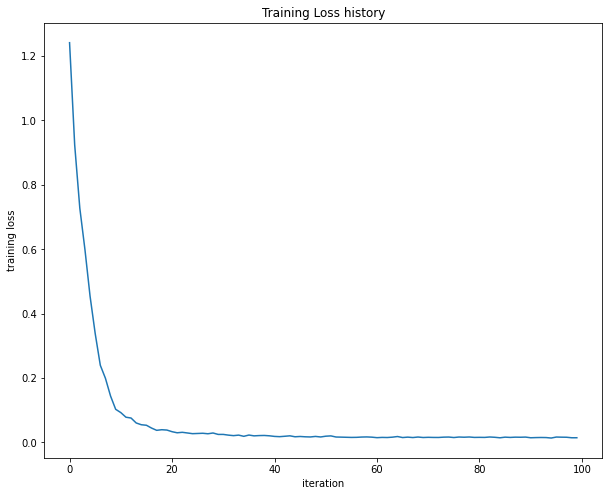

In [12]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)
print(stats)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

### Load CIFAR-10
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [13]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier.   
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './datasets/'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [14]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = Network(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302978
iteration 100 / 1000: loss 2.302529
iteration 200 / 1000: loss 2.298005
iteration 300 / 1000: loss 2.250354
iteration 400 / 1000: loss 2.190562
iteration 500 / 1000: loss 2.135922
iteration 600 / 1000: loss 2.050964
iteration 700 / 1000: loss 2.010513
iteration 800 / 1000: loss 2.049565
iteration 900 / 1000: loss 1.968288
Validation accuracy:  0.281


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

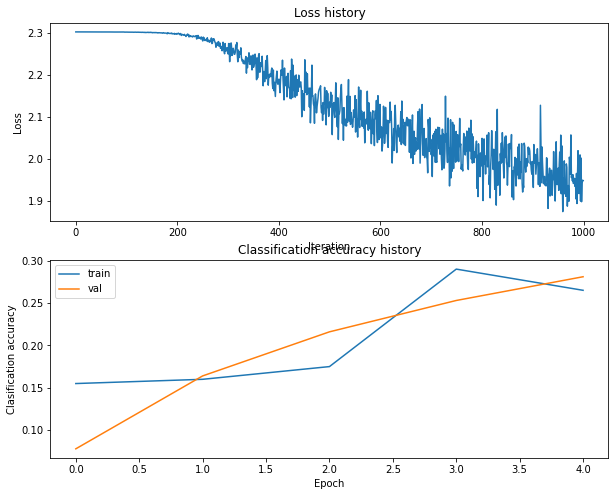

In [15]:
def plot_loss_history(stats):
    """ Plot the loss function over the epochs / iterations """
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

def plot_train_validation_accuracy(stats):
    """ Plot the training accuracies with the validation accuracies to see how they compare """
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.show()

plot_loss_history(stats)
plot_train_validation_accuracy(stats)

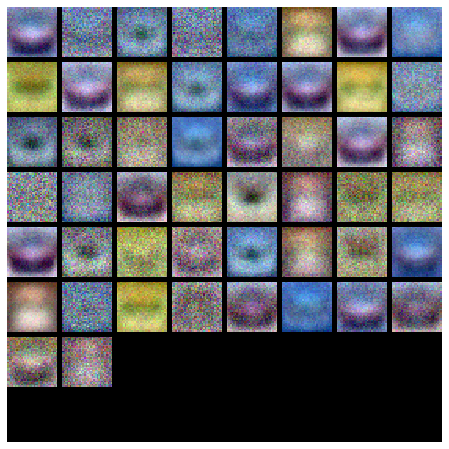

In [16]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

##Task 3: Tune Your Network

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [18]:
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
import pandas as pd 
def build_hyperparameter_grid(): 
    """ build a grid of all the hyperparameter values to search over
    returns: 

    matrix with 1 column per hyperparameter, each row representing a combination of 
    hyperparameter values
    # Includes tuning for 
    # batch size 
    # hidden layer size
    # regularization strength
    # activation function to use on hidden layer: relu=1/sigmoid=0
    # number of training epochs 
    # learning rate 
    """
    num_unique_values_per_hyperparam = 2
    batch_sizes = np.linspace(200, 2000, num=num_unique_values_per_hyperparam, dtype=int)
    hidden_layer_sizes = np.linspace(5, 200, num=num_unique_values_per_hyperparam, dtype=int)
    regularizations = np.linspace(1e-5, 1e-3, num=num_unique_values_per_hyperparam, dtype=float)
    epochs = np.linspace(100, 1000, num=num_unique_values_per_hyperparam, dtype=int)
    learning_rates = np.linspace(1e-3, .1, num=num_unique_values_per_hyperparam, dtype=float)
    activation_function = np.array(['relu', 'sigmoid']) 
    # use a dataframe otherwise numerical data gets casted to string when you combine into grid
    grid = pd.DataFrame(columns=[
        'batch_size','hidden_layer_size','regularization',
        'epochs', 'learning_rate', 'activation_function'])
    for bs in batch_sizes:
        for hls in hidden_layer_sizes:
            for rs in regularizations:
                for te in epochs:
                    for lr in learning_rates: 
                        for af in activation_function:
                            grid.loc[len(grid.index)] = [bs, hls, rs, te, lr, af]
    return grid 

def plot_loss_history(stats, show=True, save_to_filepath=None):
    """ Plot the loss function over the epochs / iterations. 
    show plot by default unless show=False. 
    don't save anywhere unless save_to_filepath arg provided.  """
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    if save_to_filepath:
        plt.savefig(save_to_filepath)
    if show:
        plt.show()
        
def plot_train_validation_accuracy(stats, show=True, save_to_filepath=None):
    """ Plot the training accuracies with the validation accuracies 
    to see how they compare. show plot by default unless show=False. 
    don't save anywhere unless save_to_filepath arg provided. """
    plt.figure()
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    if save_to_filepath:
        plt.savefig(save_to_filepath)
    if show:
        plt.show()
  
def plot_net_weights(net, show=True, save_to_filepath=None):
    """ Visualize weights of the network. show plot by default unless show=False. 
    don't save anywhere unless save_to_filepath arg provided."""
    plt.figure()
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    if save_to_filepath:
        plt.savefig(save_to_filepath)
    if show:
        plt.show() 

best_accuracy = -1 
best_net = None # store the best model into this 
best_val = -1
best_stats = []

grid = build_hyperparameter_grid()
input_size = 32 * 32 * 3 # constant 
print(f'Tuning the following hyperparameters: {grid.columns}')
for index, r in grid.iterrows():    
    print(f'CONFIG_{index},epochs={r.epochs},hidden_layer_size={r.hidden_layer_size},batch_size={r.batch_size},alpha={r.learning_rate},reg={r.regularization},activation={r.activation_function}')
    net = Network(
        input_size=input_size, 
        hidden_size=r.hidden_layer_size,
        output_size=num_classes)

    stats = net.train(
        X_train, y_train, X_val, y_val,
        num_iters=r.epochs,
        batch_size=r.batch_size,
        learning_rate=r.learning_rate,
        learning_rate_decay=0.95, # leave default as recommended
        reg=r.regularization,
        activation_function=r.activation_function,
        verbose=False)  
        
    # Predict on the validation set
    validation_accuracy = (net.predict(X_val) == y_val).mean() 
    print(f'Validation accuracy: {validation_accuracy}')
    if validation_accuracy > best_val:
        best_val = validation_accuracy
        best_net = net 
        best_stats = stats 
        print('New best!')
     
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

Tuning the following hyperparameters: Index(['batch_size', 'hidden_layer_size', 'regularization', 'epochs',
       'learning_rate', 'activation_function'],
      dtype='object')
CONFIG_0,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.252
New best!
CONFIG_1,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=1e-05,activation=sigmoid
Validation accuracy: 0.154
CONFIG_2,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=1e-05,activation=relu


/content/drive/MyDrive/vandy/summer22/cs5262/hw9_new/hw9/network.py:125: RuntimeWarning: divide by zero encountered in log
  loss = -1 * np.sum(np.log(probabilities[(range(N), y)])) / N


Validation accuracy: 0.117
CONFIG_3,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=1e-05,activation=sigmoid


/content/drive/MyDrive/vandy/summer22/cs5262/hw9_new/hw9/network.py:54: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-data))


Validation accuracy: 0.156
CONFIG_4,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.33
New best!
CONFIG_5,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=1e-05,activation=sigmoid
Validation accuracy: 0.154
CONFIG_6,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=1e-05,activation=relu


/content/drive/MyDrive/vandy/summer22/cs5262/hw9_new/hw9/network.py:119: RuntimeWarning: overflow encountered in subtract
  scores -= np.max(scores, axis=1, keepdims=True)
/content/drive/MyDrive/vandy/summer22/cs5262/hw9_new/hw9/network.py:119: RuntimeWarning: invalid value encountered in subtract
  scores -= np.max(scores, axis=1, keepdims=True)


Validation accuracy: 0.087
CONFIG_7,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=1e-05,activation=sigmoid
Validation accuracy: 0.214
CONFIG_8,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=0.001,activation=relu
Validation accuracy: 0.254
CONFIG_9,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=0.001,activation=sigmoid
Validation accuracy: 0.154
CONFIG_10,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=0.001,activation=relu
Validation accuracy: 0.15
CONFIG_11,epochs=100,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=0.001,activation=sigmoid
Validation accuracy: 0.156
CONFIG_12,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=0.001,activation=relu
Validation accuracy: 0.332
New best!
CONFIG_13,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=0.001,activation=sigmoid
Validation accuracy: 0.154
CONFIG_14,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.1,reg=0.001,activation=relu
Validation accurac

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Validation accuracy: 0.087
CONFIG_39,epochs=1000,hidden_layer_size=5,batch_size=2000,alpha=0.1,reg=1e-05,activation=sigmoid
Validation accuracy: 0.23
CONFIG_40,epochs=100,hidden_layer_size=5,batch_size=2000,alpha=0.001,reg=0.001,activation=relu
Validation accuracy: 0.232
CONFIG_41,epochs=100,hidden_layer_size=5,batch_size=2000,alpha=0.001,reg=0.001,activation=sigmoid
Validation accuracy: 0.176
CONFIG_42,epochs=100,hidden_layer_size=5,batch_size=2000,alpha=0.1,reg=0.001,activation=relu
Validation accuracy: 0.111
CONFIG_43,epochs=100,hidden_layer_size=5,batch_size=2000,alpha=0.1,reg=0.001,activation=sigmoid
Validation accuracy: 0.185
CONFIG_44,epochs=1000,hidden_layer_size=5,batch_size=2000,alpha=0.001,reg=0.001,activation=relu
Validation accuracy: 0.317
CONFIG_45,epochs=1000,hidden_layer_size=5,batch_size=2000,alpha=0.001,reg=0.001,activation=sigmoid
Validation accuracy: 0.153
CONFIG_46,epochs=1000,hidden_layer_size=5,batch_size=2000,alpha=0.1,reg=0.001,activation=relu
Validation accura

The maximum accuracy reached in the above tests was 0.5. 
We can do some pair comparisons to isolate specific variables to see how the correlate with the accuracy. 

From these two, we can see that the relu activation function performed much better. 
```
CONFIG_20,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.5
CONFIG_21,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=sigmoid
Validation accuracy: 0.223
```
Now let's focus on regularization. 
```
CONFIG_20,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.5
CONFIG_28,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=0.001,activation=relu
Validation accuracy: 0.496
```
The only difference between 0.5 and 0.496 is increasing the reg from 1e-05 to 0.001. Which means maybe decreasing the reg a bit more could help. Next we focus on alpha. 
```
CONFIG_20,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.5
CONFIG_22,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.1,reg=1e-05,activation=relu
Validation accuracy: 0.087
```
Keeping everything else constant and increasing the learning rate by 2 degrees of magnitude drastically reduced accuracy. Next round focuses on batch size. 
```
CONFIG_20,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.5
CONFIG_52,epochs=1000,hidden_layer_size=200,batch_size=2000,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.475
```
Increasing batch size by a degree of magnitude dropped the accuracy a bit. Next round focuses on hidden layer size.
```
CONFIG_20,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.5
CONFIG_4,epochs=1000,hidden_layer_size=5,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.33
New best!
```
Accuracy is much lower with hidden layer size of 5 than with hidden layer size of 200. Next round focuses on training iterations. 
```
CONFIG_20,epochs=1000,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.5
CONFIG_16,epochs=100,hidden_layer_size=200,batch_size=200,alpha=0.001,reg=1e-05,activation=relu
Validation accuracy: 0.304
```
As expected, increasing training iterations from 100 to 1000 increased accuracy. 

Applying what we learned above to a new test. 



In [37]:
net = Network(
    input_size=input_size, 
    hidden_size=600,
    output_size=num_classes
  )

stats = net.train(
    X_train, 
    y_train, 
    X_val, 
    y_val,
    num_iters=1000,
    batch_size=250,
    learning_rate=1e-3,
    learning_rate_decay=0.95, # leave default as recommended
    reg=1e-2,
    activation_function='relu',
    verbose=False
)
    
# Predict on the validation set
validation_accuracy = (net.predict(X_val) == y_val).mean() 
print(f'Validation accuracy: {validation_accuracy}')
if validation_accuracy > best_val:
    best_val = validation_accuracy
    best_net = net 
    best_stats = stats 
    print('New best!')

Validation accuracy: 0.503


### Task: Explain the technologies you used with >=50 words (e.g., which parameters are changed, what are the new strategies, and reasoning) (5’)
I used a dataframe to store an initial grid of hyperparameter value combinations to explore (with a column per hyperparameter I was interested in tuning) and iterated over each row to create, train, and measure accuracy of a new neural network for each combination. Once I identified the top-performing combination of hyperparameter values, I then drilled down and did some pairwise comparisons between that combination and others, isolating specific parameters to understand how they correlated with accuracy. Then I just extrapolated that correlation for each variable into new values for one last model which gave me a validation accuracy of 0.503. 

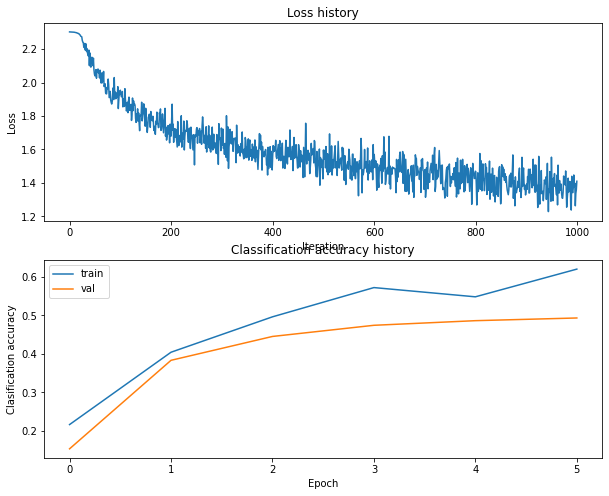

In [38]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

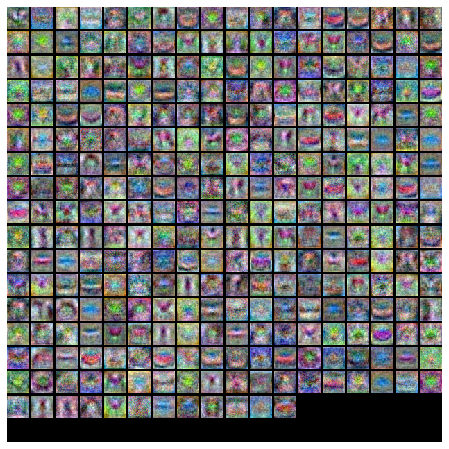

In [39]:
# visualize the weights of the best network
show_net_weights(best_net)

### Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [40]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.49
